In [66]:
import pandas as pd
import geopandas as gp

import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 7, 7

In [43]:
df_fcc = pd.read_csv("../data/ILLINOIS/fcc_477_census_tract_IL.csv")
df_ookla = pd.read_csv("../data/ILLINOIS/ookla_combined_il.csv")
geojson_ch = gp.read_file("../data/ILLINOIS/chicago_2020_q3_fixed.geojson")

## Basic exploration

In [45]:
geojson_ch.head(3)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
0,0302222310121122,171488,18115,11,554,152,"POLYGON ((-87.64893 41.95541, -87.64343 41.955..."
1,0302222310230202,139203,47213,11,385,23,"POLYGON ((-87.80273 41.81636, -87.79724 41.816..."
2,0302222312012113,189975,94340,8,64,15,"POLYGON ((-87.76428 41.73443, -87.75879 41.734..."


In [51]:
# getting speet to mbps
geojson_ch['avg_d_mbps'] = geojson_ch.avg_d_kbps.apply(lambda x: x/(10**3))
geojson_ch['avg_u_mbps'] = geojson_ch.avg_u_kbps.apply(lambda x: x/(10**3))

geojson_ch.head(3)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,avg_d_mbps,avg_u_mbps
0,0302222310121122,171488,18115,11,554,152,"POLYGON ((-87.64893 41.95541, -87.64343 41.955...",171.488,18.115
1,0302222310230202,139203,47213,11,385,23,"POLYGON ((-87.80273 41.81636, -87.79724 41.816...",139.203,47.213
2,0302222312012113,189975,94340,8,64,15,"POLYGON ((-87.76428 41.73443, -87.75879 41.734...",189.975,94.340


In [53]:
geojson_ch.shape

(7064, 9)

<AxesSubplot:>

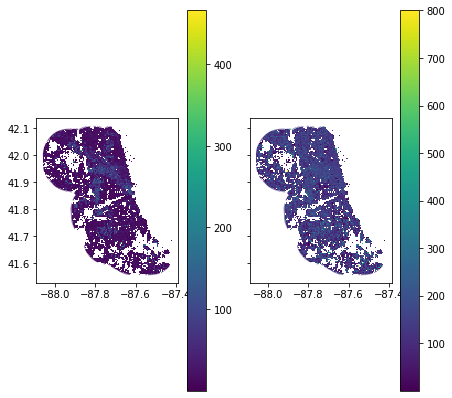

<Figure size 504x504 with 0 Axes>

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)

f = plt.figure(figsize=(7,7))
geojson_ch.plot(ax=ax1, column='avg_u_mbps', legend=True, figsize=figsize)
geojson_ch.plot(ax=ax2, column='avg_d_mbps', legend=True, figsize=figsize)